In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [3]:
logits = torch.randn(1, 10)

In [20]:

sample = F.gumbel_softmax(logits, tau=0.5, hard=False)

print(sample, sample.argmax(dim=-1))

tensor([[1.3220e-05, 9.8939e-01, 1.9288e-06, 3.8526e-05, 1.0016e-02, 1.5857e-05,
         9.4428e-05, 3.9104e-04, 1.4562e-05, 2.3172e-05]]) tensor([1])


In [15]:
sample = F.gumbel_softmax(logits, tau=0.5, hard=True)
print(sample)

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])


In [21]:
from torch.distributions import RelaxedOneHotCategorical

concrete_dist = RelaxedOneHotCategorical(temperature=torch.tensor([0.5]), logits=logits)


concrete_dist.log_prob(sample)



tensor([65.5012])

In [31]:
sampl = concrete_dist.sample()

In [33]:
one_hot = (sampl == sampl.max(dim=1, keepdim=True).values).float()

print(one_hot)

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])


In [40]:
one_hot.argmax(dim=1)

tensor([4])

In [44]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Initialize model and tokenizer
model_name = "gpt2"  # Substitute with any autoregressive model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Given prompt and fixed sequence
prompt = "Once upon a time"
continuation = "in a land far away"

# Concatenate prompt and continuation, and tokenize
input_text = prompt + continuation
inputs = tokenizer(input_text, return_tensors="pt")

# Perform a forward pass to get logits for each position
with torch.no_grad():
    outputs = model(**inputs, labels=inputs["input_ids"])
    logits = outputs.logits  # Shape: (batch_size, seq_len, vocab_size)

# Calculate log-probabilities of the continuation given the prompt
log_probs = torch.nn.functional.log_softmax(logits, dim=-1)

# Get the indices of tokens in the continuation
prompt_tokens = tokenizer(prompt)['input_ids']
continuation_ids = inputs["input_ids"][0][len(prompt_tokens):]

# Sum the log-probabilities of each token in the continuation
log_likelihood = sum(log_probs[0, i, token_id].item() for i, token_id in enumerate(continuation_ids))

In [45]:
log_likelihood

-35.75233656167984

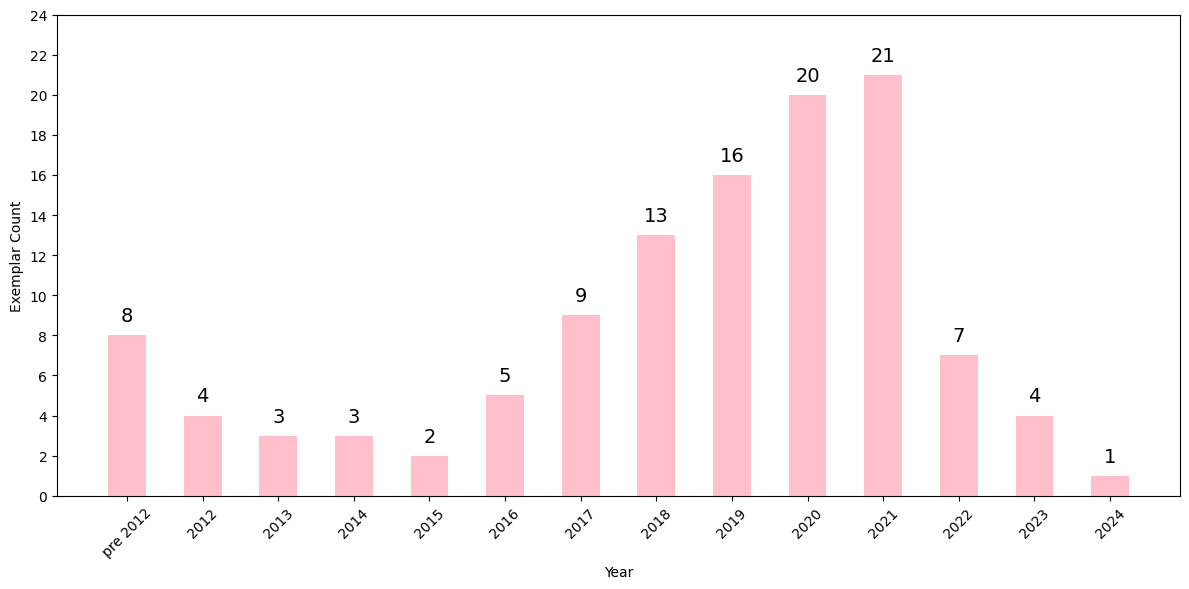

In [78]:
import matplotlib.pyplot as plt

# Data
years = [
    "pre 2012", "2012", "2013", "2014", "2015", "2016", "2017", 
    "2018", "2019", "2020", "2021", "2022", "2023", "2024"
]
paper_counts = [8, 4, 3, 3, 2, 5, 9, 13, 16, 20, 21, 7, 4, 1]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(years, paper_counts, color="pink", width=0.5)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom", fontsize="14")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Exemplar Count")
# plt.title("Paper Count per Year")e
plt.xticks(rotation=45)
plt.yticks(range(0, 25, 2))  # Set y-axis ticks to integer values up to 24
plt.ylim(0, 24)  # Set y-axis limit to 24
plt.tight_layout()

# Show plot
plt.show()


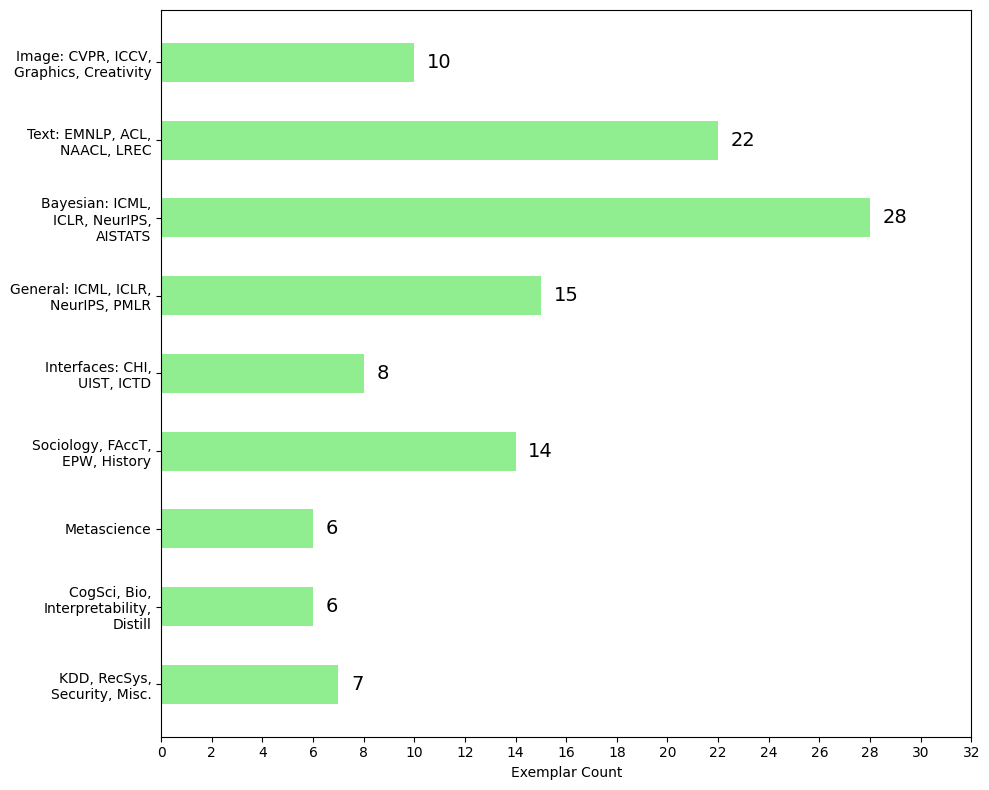

In [83]:
import matplotlib.pyplot as plt
import textwrap

# Data
categories = [
    "Image: CVPR, ICCV, Graphics, Creativity",
    "Text: EMNLP, ACL, NAACL, LREC",
    "Bayesian: ICML, ICLR, NeurIPS, AISTATS",
    "General: ICML, ICLR, NeurIPS, PMLR",
    "Interfaces: CHI, UIST, ICTD",
    "Sociology, FAccT, EPW, History",
    "Metascience",
    "CogSci, Bio, Interpretability, Distill",
    "KDD, RecSys, Security, Misc.",
    
]
paper_counts = [10, 22, 28, 15, 8, 14, 6, 6, 7]

# Sort by paper count
# sorted_data = sorted(zip(paper_counts, categories), reverse=True)
# paper_counts, categories = zip(*sorted_data)

# Wrap text for labels
wrapped_labels = [textwrap.fill(label, width=20) for label in categories]

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(wrapped_labels, paper_counts, color="lightgreen", height=0.5)

# Add values next to bars
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()), va="center", ha="left", fontsize="14")

# Labels and layout
plt.xlabel("Exemplar Count")
plt.xticks(range(0, 34, 2))  # Set y-axis ticks to integer values up to 24
# plt.title("Paper Count by Category")
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()

# Show plot
plt.show()
